In [4]:
import numpy as np
from roipoly import roipoly
import logging
import cv2
import glob
import pylab as pl
import os
import pickle
from skimage import measure
from g_data import get_gdata
from g_data import get_pic
from prob import get_pic1
from g_data import get_prob
from plot_ols import l_reg
from skimage import data, util
from skimage.measure import label, regionprops
import math
import time

In [2]:
my_pic=os.listdir('/Users/vaish/Desktop/img')
X = np.empty((0,4), int)

for img_file in my_pic:
    
     if img_file.split(".")[-1].lower() in {"jpeg", "jpg", "png"}:
            img1 = cv2.imread(img_file)
            img2 = cv2.cvtColor(img1,cv2.COLOR_RGB2BGR)
            imgz = np.reshape(img1,(960000,3))
            one = np.ones((960000,1))
            trainimg = np.concatenate((imgz,one),1)
            X = np.vstack((X,trainimg))
 

In [3]:
Y = np.empty((0,1), int)

for filename in os.listdir("./labeled_data/BlueBarrel/"):
    basename, extension = os.path.splitext(filename)
    if (extension != ".npy"):
        continue
    bluebarrel = np.load('./labeled_data/BlueBarrel/'+filename)
    bluebarrel = np.array(bluebarrel,dtype=int)
    y = np.reshape(bluebarrel,(960000,1))
    Y = np.vstack((Y,y))

                
            

0
[0]


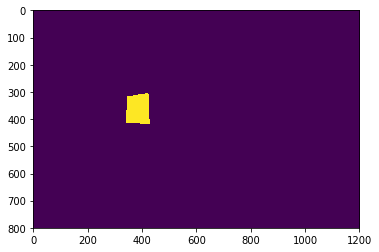

In [4]:
bluebarrel = np.load('./labeled_data/BlueBarrel/2.npy')
bluebarrel = np.array(bluebarrel,dtype=int)
#pl.imshow(bluebarrel)
j = np.reshape(bluebarrel,(960000,1))
y1 = np.reshape(j,(800,1200))
pl.imshow(y1)
if(bluebarrel.any()==False):
    print("yes")
print(bluebarrel[1,1])
print(Y[1])

In [5]:
print(X)

[[145. 137. 130.   1.]
 [142. 134. 127.   1.]
 [142. 134. 127.   1.]
 ...
 [ 13.  22.  34.   1.]
 [ 12.  22.  38.   1.]
 [ 10.  22.  39.   1.]]


In [6]:
print(Y.min())
print(Y.max())
print(X.shape)
print(Y.shape)

0
1
(39360000, 4)
(39360000, 1)


In [12]:
w=np.zeros((4,1))
sig=1/(1+np.exp(-(Y[36,:]*X[36,:].dot(w))))
print(sig)
a=1-sig
print(a)
b=X*Y*a
print(b)
print(b.max())
c = b.sum(axis=0)



[0.5]
[0.5]
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 ...
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
127.5


In [16]:
for n, i in enumerate(Y):
    if i == 0:
        Y[n] = -1

In [18]:
print(Y.min())
print(Y.max())

-1
1


In [76]:
T = 50
alpha = 10e-7
#omega = np.zeros((4,1))

for t in range(T):
    x=Y*(X.dot(omega))
    sig = 1/(1+np.exp(-x))
    #print(sig)
    a=1-sig
    grad = Y*X*a
    #print(grad)
    step_val=alpha*(grad.sum(axis=0).reshape(4,1))
    #print(step_val)
    omega+=step_val
    #print(omega)


In [77]:
print(omega)
omega3 = [[ 204.37414637]
 [-129.6109561 ]
 [-108.45771227]
 [ -18.90745388]]

[[ 204.37414637]
 [-129.6109561 ]
 [-108.45771227]
 [ -18.90745388]]


In [87]:
omega = [[ 263.91425485],
         [-123.02686328],
         [-211.60120971],
         [ -11.19707942]]

omega1= [[ 648.39503027],
         [-167.26574732],
         [-731.34300279],
         [   1.45280908]]
omega=np.array(omega)
omega=omega
print(omega)

[[ 263.91425485]
 [-123.02686328]
 [-211.60120971]
 [ -11.19707942]]


In [20]:
print(w)

[[5266.4068 ]
 [3736.61375]
 [2621.61775]
 [  45.5142 ]]


(800, 1200)


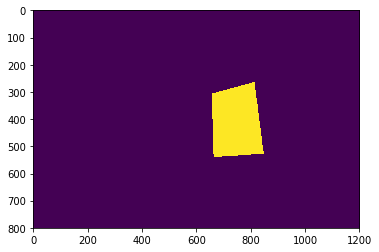

In [13]:
print(y.shape)

(960000, 1)


In [68]:
test_img1 = cv2.imread('1.png')
imgg=cv2.cvtColor(test_img1,cv2.COLOR_RGB2BGR)
imgy=cv2.cvtColor(test_img1,cv2.COLOR_RGB2YCR_CB)
imgz = np.reshape(imgy,(960000,3))
one = np.ones((960000,1))
testimg = np.concatenate((imgz,one),1)
pic = np.zeros((800,1200))

In [42]:
w = [[-7], [6],[8], [-2]]

In [88]:
test = testimg.dot(omega)
print(test.max())

29510.99452157001


In [44]:
print(a.shape)

(39360000, 4)


In [89]:
test = (test>0).astype(int)

In [90]:
if test.any()==1:
    print("true")
else:
    print("false")

true


In [91]:
test = np.reshape(test,(800,1200))

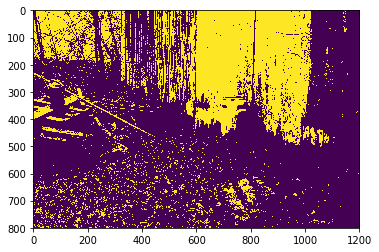

In [92]:
pl.imshow(test)

In [5]:
test_img = cv2.imread('14.png')
imgg=cv2.cvtColor(test_img,cv2.COLOR_RGB2BGR)
imgy=cv2.cvtColor(test_img,cv2.COLOR_RGB2YCR_CB)
img14 = get_pic(imgy)

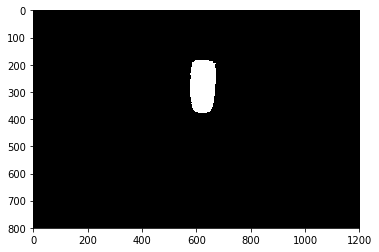

In [98]:
pl.imshow(img14)

In [104]:
print(test.shape)
print(img14.shape)
im = cv2.cvtColor(img14,cv2.COLOR_BGR2GRAY)
error = np.logical_xor(test,img14)
print(error)

(800, 1200)
(800, 1200, 3)


error: OpenCV(3.4.1) C:\Miniconda3\conda-bld\opencv-suite_1533128839831\work\modules\imgproc\src\color.cpp:11109: error: (-215) depth == 0 || depth == 2 || depth == 5 in function cv::cvtColor


In [94]:
test_img = cv2.imread('43.png')
imgg=cv2.cvtColor(test_img,cv2.COLOR_RGB2BGR)
imgy=cv2.cvtColor(test_img,cv2.COLOR_RGB2YCR_CB)
img43 = get_pic(imgy)

In [95]:
test_img = cv2.imread('44.png')
imgg=cv2.cvtColor(test_img,cv2.COLOR_RGB2BGR)
imgy=cv2.cvtColor(test_img,cv2.COLOR_RGB2YCR_CB)
img44 = get_pic(imgy)

In [96]:
test_img = cv2.imread('45.png')
imgg=cv2.cvtColor(test_img,cv2.COLOR_RGB2BGR)
imgy=cv2.cvtColor(test_img,cv2.COLOR_RGB2YCR_CB)
img45 = get_pic(imgy)

In [97]:
test_img = cv2.imread('46.png')
imgg=cv2.cvtColor(test_img,cv2.COLOR_RGB2BGR)
imgy=cv2.cvtColor(test_img,cv2.COLOR_RGB2YCR_CB)
img46 = get_pic(imgy)